<a href="https://colab.research.google.com/github/urspravi/my_projects/blob/main/Convolutional_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement and evaluate a Convolutional Autoencoder (CAE) for image compression and reconstruction. You can use publicly available datasets like CIFAR-10. CelebA or any other dataset of your choice

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download jessicali9530/celeba-dataset

100% 1.33G/1.33G [01:03<00:00, 23.9MB/s]
100% 1.33G/1.33G [01:03<00:00, 22.4MB/s]


In [ ]:
! unzip celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,InputLayer,Conv2DTranspose
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import losses
from keras import models
import os
from PIL import Image

In [ ]:
df_partition = pd.read_csv('/content/list_eval_partition.csv')
img_dir = '/content/img_align_celeba/img_align_celeba/'
train_paths = [img_dir + i for i in df_partition[df_partition['partition'] == 0]['image_id']]
val_paths = [img_dir + i for i in df_partition[df_partition['partition'] == 1]['image_id']]
test_paths = [img_dir + i for i in df_partition[df_partition['partition'] == 2]['image_id']]
print(f'Train: {len(train_paths)}')
print(f'Val: {len(val_paths)}')
print(f'Test: {len(test_paths)}')

Train: 162770
Val: 19867
Test: 19962


In [ ]:
df_partition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   image_id   202599 non-null  object
 1   partition  202599 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
df_partition

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


In [ ]:
for i in train_paths:
  img = Image.open(i)
  print (img.size)

Streaming output truncated to the last 5000 lines.
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(17

In [ ]:
for i in test_paths:
  img = Image.open(i)
  print (img.size)

Streaming output truncated to the last 5000 lines.
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(17

In [ ]:
for i in val_paths:
  img = Image.open(i)
  print (img.size)

Streaming output truncated to the last 5000 lines.
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(178, 218)
(17

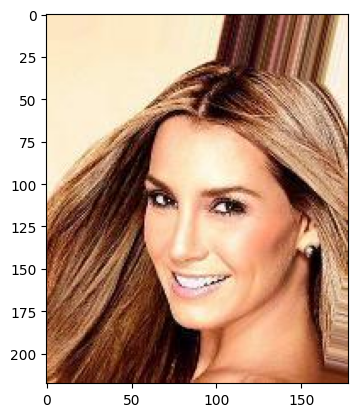

In [ ]:
fnames=list(df_partition.image_id.unique())
fnames[0]
image = load_img("/content/img_align_celeba/img_align_celeba/"+fnames[0])
plt.imshow(image)

In [ ]:
np.array(image).shape

(218, 178, 3)

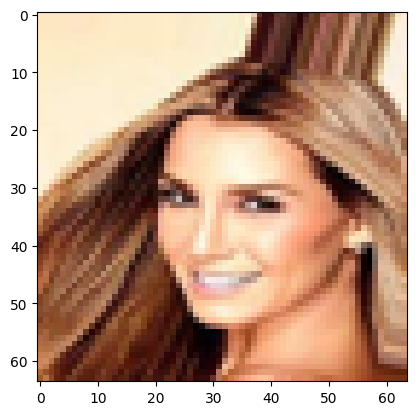

In [ ]:
path = "/content/img_align_celeba/img_align_celeba/"+fnames[0]
img = Image.open(path)
img = img.resize((64,64))
img = np.array(img)
plt.axis('on')
plt.imshow(img)

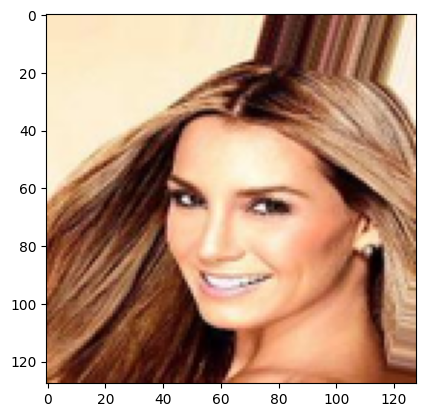

In [ ]:
path = "/content/img_align_celeba/img_align_celeba/"+fnames[0]
img2 = Image.open(path)
img2 = img2.resize((128,128))
img2 = np.array(img2)
plt.axis('on')
plt.imshow(img2)

In [ ]:
fnames[0]

'000001.jpg'

In [ ]:
from PIL import Image

def load_image(path, gray=False):
    img = Image.open(path)
    img = img.resize((64,64))
    if gray:
        img = img.convert('L')
    return np.array(img)

def load_image2(path, gray=False):
    img = Image.open(path)
    img = img.resize((128,128))
    if gray:
        img = img.convert('L')
    return np.array(img)

def normalize(img):
    img = img / 255
    return img

def denormalize(img):
    img = img * 255
    return img

def show(img, gray=False):
    plt.axis('on')
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)

In [ ]:
#train_images = np.array([load_image(path, gray=gray)
                         #for path in train_paths[:5000]])
#train_images = normalize(train_images)
#train_images.shape

In [ ]:
train_images2 = np.array([load_image2(path, gray=False)
                         for path in train_paths[:5000]])
train_images2 = normalize(train_images2)
train_images2.shape

(5000, 128, 128, 3)

In [ ]:
#test_images = np.array([load_image(path, max_dim=max_dim, gray=gray)
                        # for path in test_paths[: 1000]])
#test_images = normalize(test_images)
#test_images.shape

In [ ]:
test_images2 = np.array([load_image2(path, gray=False)
                         for path in test_paths[: 50]])
test_images2 = normalize(test_images2)
test_images2.shape

(50, 128, 128, 3)

In [ ]:
#val_images =  np.array([load_image(path, max_dim=max_dim, gray=gray)
                        # for path in val_paths[: 1000]])
#val_images = normalize(val_images)
#val_images.shape

In [ ]:
val_images2 =  np.array([load_image2(path, gray=False)
                         for path in val_paths[: 50]])
val_images2 = normalize(val_images2)
val_images2.shape

(50, 128, 128, 3)

Shape: (128, 128, 3)


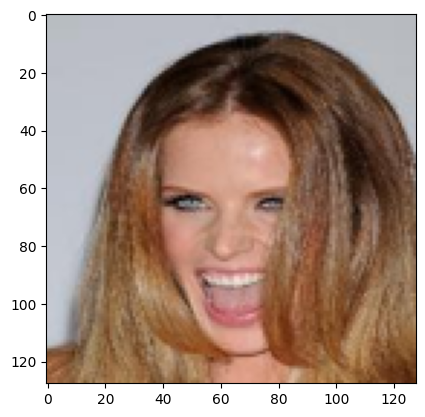

In [ ]:
im = load_image2(train_paths[100031],  gray=False)
image_shape = im.shape
print(f'Shape: {image_shape}')
show(im)

In [ ]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dropout, BatchNormalization, Flatten, Reshape
from tensorflow.keras.models import Sequential

dropout_rate = 0.3
DIMEN = 128
kernel_size = (4, 4)

NEURAL_SCHEMA = [
    Conv2D(32, input_shape=(DIMEN, DIMEN, 3), kernel_size=kernel_size, strides=1, activation="relu"),
    Dropout(dropout_rate),
    BatchNormalization(),
    Conv2D(64, kernel_size=kernel_size, strides=1, activation="relu"),
    Dropout(dropout_rate),
    Conv2D(128, kernel_size=kernel_size, strides=1, activation="relu"),
    Dropout(dropout_rate),
    Conv2D(256, kernel_size=kernel_size, strides=1, activation="relu"),
    Dropout(dropout_rate),
    Flatten(),
    Reshape((116, 116, 256)),  # Adjust the output shape based on your specific requirements
    Conv2DTranspose(128, kernel_size=kernel_size, strides=1, activation="relu"),
    BatchNormalization(),
    Conv2DTranspose(64, kernel_size=kernel_size, strides=1, activation="relu"),
    BatchNormalization(),
    Conv2DTranspose(32, kernel_size=kernel_size, strides=1, activation="relu"),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), strides=1, activation="relu", padding='same'),
    Conv2DTranspose(3, kernel_size=kernel_size, strides=1, activation="tanh"),
]

model = Sequential(NEURAL_SCHEMA)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 32)      1568      
                                                                 
 dropout (Dropout)           (None, 125, 125, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 125, 125, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      32832     
                                                                 
 dropout_1 (Dropout)         (None, 122, 122, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 128)     131200    
                                                        

In [ ]:
encoder=Sequential()
encoder.add(InputLayer(input_shape=(128,128,3)))
for layer in model.layers[:10]:
    encoder.add(layer)
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 32)      1568      
                                                                 
 dropout (Dropout)           (None, 125, 125, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 125, 125, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      32832     
                                                                 
 dropout_1 (Dropout)         (None, 122, 122, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 128)     131200    
                                                      

In [ ]:
from keras.layers import Input
encoded_input = Input(shape=(3444736,))
deco=model.layers[10](encoded_input)
for layer in model.layers[11:]:
    deco=layer(deco)
decoder = Model(encoded_input, deco)
decoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3444736)]         0         
                                                                 
 reshape (Reshape)           (None, 116, 116, 256)     0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 119, 119, 128)     524416    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 119, 119, 128)     512       
 chNormalization)                                                
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 122, 122, 64)      131136    
 Transpose)                                                      
                                                             

In [ ]:
model.compile(
    optimizer=optimizers.Adam(0.00001),
    loss=losses.mean_squared_error,
    metrics=['mae'],
)

In [ ]:
model.fit(train_images2, train_images2,
                epochs=5,
                shuffle=True,
                validation_data=(test_images2, test_images2))

Epoch 1/5
157/157 [==============================] - 156s 825ms/step - loss: 0.2809 - mae: 0.3976 - val_loss: 0.1043 - val_mae: 0.2530
Epoch 2/5
157/157 [==============================] - 123s 783ms/step - loss: 0.0563 - mae: 0.1787 - val_loss: 0.0377 - val_mae: 0.1437
Epoch 3/5
157/157 [==============================] - 123s 782ms/step - loss: 0.0330 - mae: 0.1356 - val_loss: 0.0250 - val_mae: 0.1161
Epoch 4/5
157/157 [==============================] - 123s 782ms/step - loss: 0.0254 - mae: 0.1175 - val_loss: 0.0199 - val_mae: 0.1019
Epoch 5/5
157/157 [==============================] - 123s 780ms/step - loss: 0.0213 - mae: 0.1070 - val_loss: 0.0170 - val_mae: 0.0933


In [ ]:
encoded_imgs = encoder(test_images2).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

ResourceExhaustedError: ignored

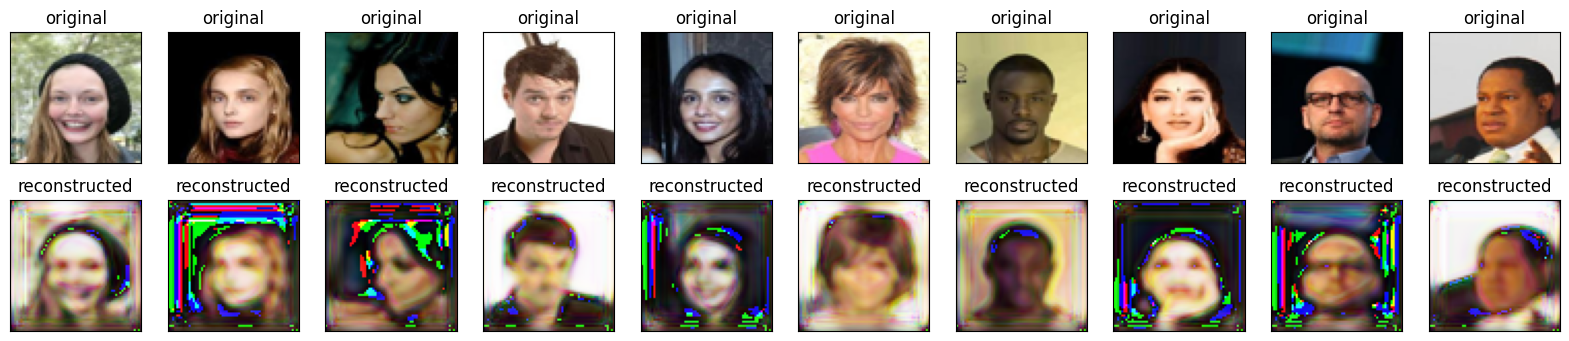

In [ ]:
import random
n = 10
rand = random.randint(0, len(test_images) - n)

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(((test_images[i + rand])*255).astype(np.uint8))
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Display resized
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(((decoded_imgs[i + rand])*255).astype(np.uint8))
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
model.save("model1.h5")
encoder.save("encoder_face.h5")
decoder.save("decoder_face.h5")